In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import os
import cv2

In [3]:
# Set your data paths
image_train_folder = "../data/data_train/images" 
label_train_folder = "../data/data_train/gt" 

image_val_folder = "../data/data_train/images_val" 
label_val_folder = "../data/data_train/gt_val" 

image_test_folder = "../data/test/images" 

In [4]:
# Set desired image size
image_size = (512, 512)

# Read image and label data
image_train_filenames = sorted(os.listdir(image_train_folder))
label_train_filenames = sorted(os.listdir(label_train_folder))

image_val_filenames = sorted(os.listdir(image_val_folder))
label_val_filenames = sorted(os.listdir(label_val_folder))

image_test_filenames = sorted(os.listdir(image_test_folder))

In [81]:
train_images = []
train_labels = []

for image_filename in image_train_filenames:
    image_train_path = os.path.join(image_train_folder, image_filename)
    label_train_filename = image_filename.replace(".tif", ".tif")  # Adjust the label file extension if needed
    label_train_path = os.path.join(label_train_folder, label_train_filename)
    
    # Read and resize the image
    image_train = cv2.imread(image_train_path)
    image_train = cv2.resize(image_train, image_size)
    
    # Normalize the image
    image_train = image_train / 255.0
    
    # Read and resize the label
    train_label = cv2.imread(label_train_path, 0)  # Read as grayscale
    train_label = cv2.resize(train_label, image_size)
    
    # Append to the data lists
    train_images.append(image_train)
    train_labels.append(train_label)

# Convert data lists to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Print the shapes of the data arrays
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)

Train images shape: (155, 512, 512, 3)
Train labels shape: (155, 512, 512)


(155, 512, 512, 3)


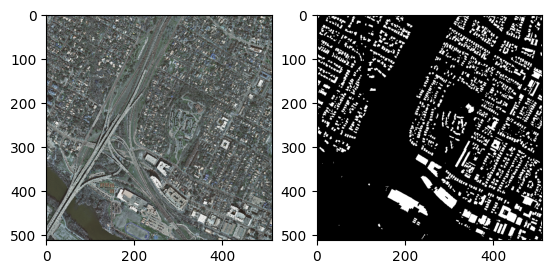

In [82]:
print(train_images.shape)
plt.subplot(1,2,1)
plt.imshow(train_images[1], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(train_labels[1], cmap="gray");

In [84]:
train_images_1 = train_images[:31]
train_labels_1 = train_labels[:31]

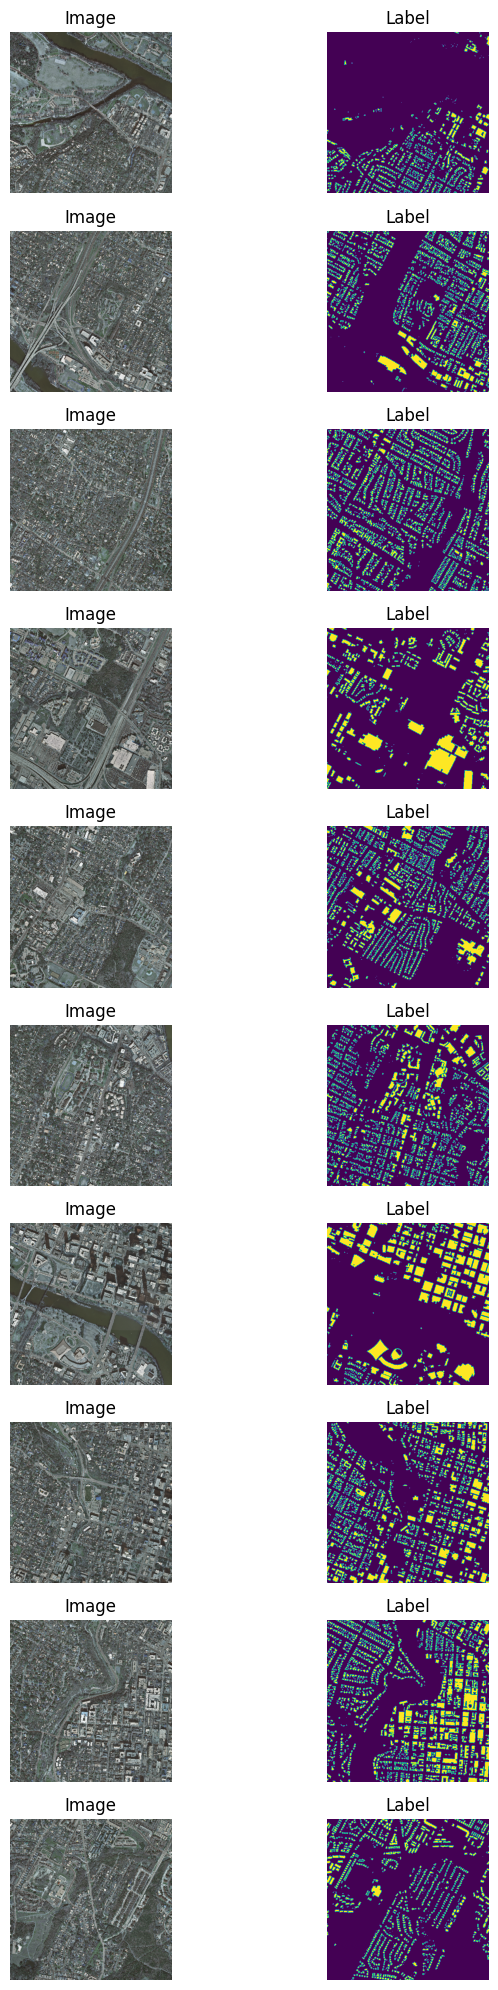

In [85]:
import matplotlib.pyplot as plt

# Plot the train images and labels side by side for the first 10 data samples
fig, axes = plt.subplots(10, 2, figsize=(8, 20))

for i in range(10):
    axes[i, 0].imshow(train_images[i])
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Image')

    axes[i, 1].imshow(train_labels[i])
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Label')

plt.tight_layout()
plt.show()

In [86]:
val_images = []
val_labels = []

for image_filename in image_val_filenames:
    image_val_path = os.path.join(image_val_folder, image_filename)
    label_val_filename = image_filename.replace(".tif", ".tif")  # Adjust the label file extension if needed
    label_val_path = os.path.join(label_val_folder, label_val_filename)
    
    # Read and resize the image
    image_val = cv2.imread(image_val_path)
    image_val = cv2.resize(image_val, image_size)
    
    # Normalize the image
    image_val = image_val / 255.0
    
    # Read and resize the label
    val_label = cv2.imread(label_val_path, 0)  # Read as grayscale
    val_label = cv2.resize(val_label, image_size)
    
    # Append to the data lists
    val_images.append(image_val)
    val_labels.append(val_label)

# Convert data lists to NumPy arrays
val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Print the shapes of the data arrays
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)

Validation images shape: (25, 512, 512, 3)
Validation labels shape: (25, 512, 512)


In [87]:
val_images_1 = val_images[:5]
val_labels_1 = val_labels[:5]

(155, 512, 512, 3)


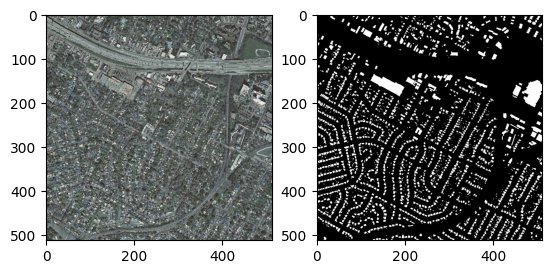

In [88]:
print(train_images.shape)
plt.subplot(1,2,1)
plt.imshow(val_images[0], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(val_labels[0], cmap="gray");

In [89]:
test_images = []

for image_filename in image_test_filenames:
    image_test_path = os.path.join(image_test_folder, image_filename)
        
    # Read and resize the image
    image_test = cv2.imread(image_test_path)
    image_test = cv2.resize(image_test, image_size)
    
    # Normalize the image
    image_test = image_test / 255.0
    
    # Append to the data list
    test_images.append(image_test)

# Convert data list to a NumPy array
test_images = np.array(test_images)

# Print the shape of the data array
print("Test images shape:", test_images.shape)

Test images shape: (180, 512, 512, 3)


In [90]:
test_images_1 = test_images[:36]

(155, 512, 512, 3)


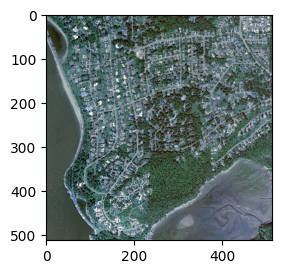

In [91]:
print(train_images.shape)
plt.subplot(1,2,1)
plt.imshow(test_images[0], cmap="gray")

In [92]:
X= train_images
y= train_labels

x= test_images

In [93]:
train_images.shape
train_labels.shape

(155, 512, 512)

In [96]:
from tensorflow.keras.layers import Dropout, BatchNormalization, Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

class UNet:
    def __init__(self, input_shape=(512, 512, 3)):
        self.input_shape = input_shape
        self.model = self.build_model()

    def encoder(self, inputs):
        conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
        conv1 = BatchNormalization()(conv1)
        conv1 = Dropout(0.1)(conv1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
        conv2 = BatchNormalization()(conv2)
        conv2 = Dropout(0.1)(conv2)
        pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
        
        conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
        conv3 = BatchNormalization()(conv3)
        conv3 = Dropout(0.1)(conv3)
        pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

        return conv1, conv2, conv3, pool3

    def decoder(self, conv1, conv2, conv3, encoded):
        up1 = UpSampling2D(size=(2, 2))(encoded)
        merge1 = Concatenate(axis=3)([conv3, up1])
        conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge1)
        conv4 = BatchNormalization()(conv4)
        conv4 = Dropout(0.1)(conv4)

        up2 = UpSampling2D(size=(2, 2))(conv4)
        merge2 = Concatenate(axis=3)([conv2, up2])
        conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge2)
        conv5 = BatchNormalization()(conv5)
        conv5 = Dropout(0.1)(conv5)
        
        up3 = UpSampling2D(size=(2, 2))(conv5)
        merge3 = Concatenate(axis=3)([conv1, up3])
        conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(merge3)
        conv6 = BatchNormalization()(conv6)
        conv6 = Dropout(0.1)(conv6)

        return conv6

    def build_model(self):
        inputs = Input(self.input_shape)
        conv1, conv2, conv3, encoded = self.encoder(inputs)
        decoded = self.decoder(conv1, conv2, conv3, encoded)
        outputs = Conv2D(1, (1, 1), activation='sigmoid')(decoded)
        return Model(inputs=inputs, outputs=outputs)

    def compile(self, optimizer='adam'):
        self.model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    def train(self, x, y, epochs=1, batch_size=32, validation_data=None):
        self.model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
        lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1)
        self.model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=validation_data, callbacks=[lr_reducer])

    def predict(self, x):
        return self.model.predict(x)

In [98]:
unet = UNet()
unet.compile()
unet.train(train_images, train_labels, epochs=20, batch_size=8, validation_data=(val_images, val_labels))

Epoch 1/10
20/20 [==============================] - 66s 3s/step - loss: -115.2178 - accuracy: 0.4787 - val_loss: 16.9321 - val_accuracy: 0.8455 - lr: 1.0000e-04
Epoch 2/10
20/20 [==============================] - 66s 3s/step - loss: -208.7484 - accuracy: 0.5046 - val_loss: 111.7064 - val_accuracy: 0.8557 - lr: 1.0000e-04
Epoch 3/10
20/20 [==============================] - 65s 3s/step - loss: -239.6587 - accuracy: 0.5230 - val_loss: 135.9680 - val_accuracy: 0.8557 - lr: 1.0000e-04
Epoch 4/10
20/20 [==============================] - 65s 3s/step - loss: -262.2277 - accuracy: 0.5324 - val_loss: 148.6086 - val_accuracy: 0.8557 - lr: 1.0000e-04
Epoch 5/10
20/20 [==============================] - 65s 3s/step - loss: -276.3905 - accuracy: 0.5436 - val_loss: 164.4070 - val_accuracy: 0.8557 - lr: 1.0000e-04
Epoch 6/10
20/20 [==============================] - ETA: 0s - loss: -293.7152 - accuracy: 0.5526
Epoch 6: ReduceLROnPlateau reducing learning rate to 1e-05.
20/20 [===========================

In [99]:
test_labels_pred = unet.predict(test_images)

test_labels_pred

6/6 [==============================] - 21s 3s/step


array([[[[0.16718623],
         [0.05478508],
         [0.04314217],
         ...,
         [0.04381522],
         [0.05017027],
         [0.12905726]],

        [[0.07392494],
         [0.0161864 ],
         [0.01261746],
         ...,
         [0.01305216],
         [0.0124929 ],
         [0.0481568 ]],

        [[0.05072305],
         [0.01093167],
         [0.00874784],
         ...,
         [0.00837951],
         [0.00861865],
         [0.04019699]],

        ...,

        [[0.03468402],
         [0.00695757],
         [0.00655661],
         ...,
         [0.00679112],
         [0.00789828],
         [0.03845249]],

        [[0.04580987],
         [0.00922783],
         [0.00915   ],
         ...,
         [0.00891921],
         [0.01026929],
         [0.0404046 ]],

        [[0.10044677],
         [0.03187227],
         [0.02854063],
         ...,
         [0.02992277],
         [0.03635915],
         [0.0878987 ]]],


       [[[0.17419049],
         [0.06023553],
         [0.05

(155, 512, 512, 3)


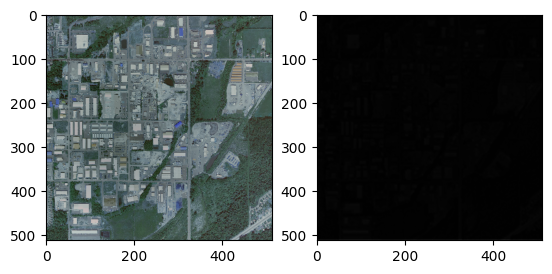

In [101]:
print(train_images.shape)
plt.subplot(1,2,1)
plt.imshow(test_images[21], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(test_labels_pred[21], cmap="gray");

In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale=1./255)
#target_size = (224, 224)

#train_generator = train_datagen.flow_from_directory(
    #'data/train/',
    #target_size=target_size,
    #batch_size=32)

#model.fit(train_generator,
          #epochs=num_epochs)